In [2]:
df = pd.read_csv("D:/Capstone project/Feature selection/gurgaon_properties_post_feature_selection_v2.csv")

In [3]:
import numpy as np
import pandas as pd

In [4]:
df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,0.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,1.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,1.0,0.0,High,Mid Floor


In [5]:
df.shape

(3554, 13)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   price            3554 non-null   float64
 2   bedRoom          3554 non-null   float64
 3   bathroom         3554 non-null   float64
 4   balcony          3554 non-null   object 
 5   agePossession    3554 non-null   object 
 6   built_up_area    3554 non-null   float64
 7   servant room     3554 non-null   float64
 8   store room       3554 non-null   float64
 9   furnishing_type  3554 non-null   float64
 10  luxury_category  3554 non-null   object 
 11  floor_category   3554 non-null   object 
dtypes: float64(7), object(5)
memory usage: 333.3+ KB


In [28]:
df['floor_category'].value_counts()

floor_category
Mid Floor     1797
Low Floor      953
High Floor     804
Name: count, dtype: int64

In [15]:
df = df.drop(columns= ['sector'])

In [16]:
df.head()

,property_type,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,flat,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,Low,Low Floor
1,flat,0.95,2.0,2.0,2,New Property,1226.0,1.0,0.0,0.0,Low,Mid Floor
2,flat,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,Low,High Floor
3,flat,1.60,3.0,4.0,3+,Relatively New,1615.0,1.0,0.0,1.0,High,Mid Floor
4,flat,0.48,2.0,2.0,1,Relatively New,582.0,0.0,1.0,0.0,High,Mid Floor


In [24]:
df['balcony'] = df['balcony'].replace('3+','4')

In [30]:
import pandas as pd
import category_encoders as ce

# Sample DataFrame (assuming df is already defined and 'price' is the target)
# df = pd.DataFrame({
#     'property_type': ['Apartment', 'Villa', 'Apartment', 'Villa'],
#     'sector': ['Sector 56', 'Sector 45', 'Sector 56', 'Sector 45'],
#     'price': [1000000, 2000000, 1500000, 2500000],
#     # Add more columns as needed
# })

# Identify categorical columns (except the target variable 'price')
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=categorical_columns)

# Fit the encoder on the data and transform the categorical columns
df_encoded = target_encoder.fit_transform(df[categorical_columns], df['price'])

# Replace the original categorical columns with the encoded ones
df[categorical_columns] = df_encoded

# Check the resulting DataFrame
df.head()


,property_type,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,1.716409,0.82,3.0,2.0,1.911879,1.992120,850.0,0.0,0.0,0.0,2.227497,2.758374
1,1.716409,0.95,2.0,2.0,1.911879,1.992120,1226.0,1.0,0.0,0.0,2.227497,2.452649
2,1.716409,0.32,2.0,2.0,0.922119,1.992120,1000.0,0.0,0.0,0.0,2.227497,2.041132
3,1.716409,1.60,3.0,4.0,3.533051,2.176917,1615.0,1.0,0.0,1.0,2.718606,2.452649
4,1.716409,0.48,2.0,2.0,0.922119,2.176917,582.0,0.0,1.0,0.0,2.718606,2.452649


In [31]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame and 'price' is the target variable
# Also assuming df already has the categorical columns target encoded

# Define the target variable
y = df['price']

# Define the features (exclude the target variable)
X = df.drop(columns=['price'])

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Print the summary of the model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     687.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:22:41   Log-Likelihood:                -6651.4
No. Observations:                3554   AIC:                         1.333e+04
Df Residuals:                    3542   BIC:                         1.340e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0815      0.478     

In [32]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and 'price' is the target variable
# Also assuming df has been target encoded as discussed previously

# Define the target variable
y = df['price']

# Define the features (excluding the target variable)
X = df.drop(columns=['price'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for compatibility with statsmodels
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the model (intercept)
X_scaled_df = sm.add_constant(X_scaled_df)

# Fit the OLS model
ols_model = sm.OLS(y, X_scaled_df).fit()

# Print the summary of the model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     687.0
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:25:36   Log-Likelihood:                -6651.4
No. Observations:                3554   AIC:                         1.333e+04
Df Residuals:                    3542   BIC:                         1.340e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.4415      0.026     

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

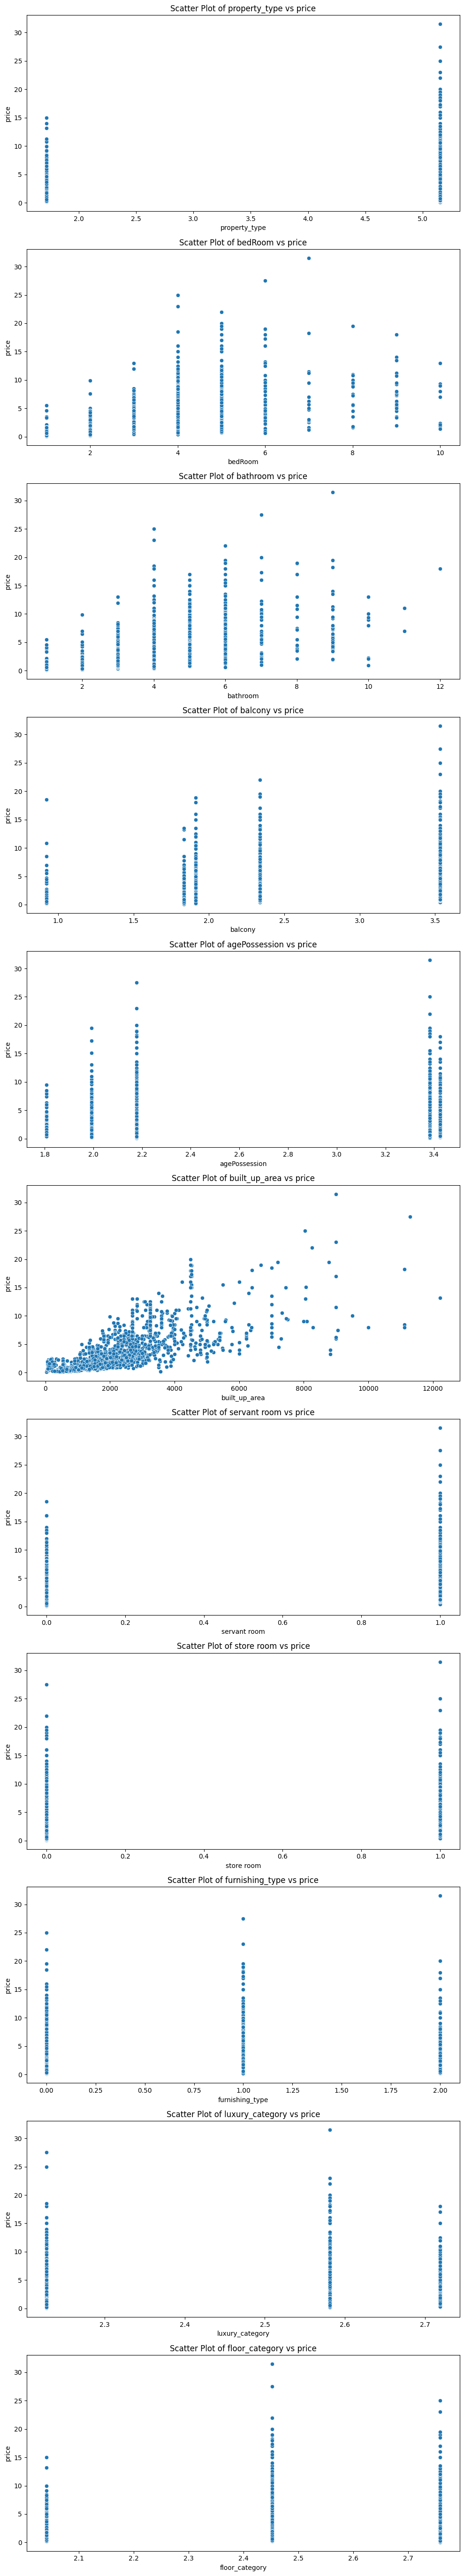

In [35]:
target = 'price'

# Define the features (excluding the target variable)
features = df.drop(columns=[target])

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=len(features.columns), ncols=1, figsize=(10, len(features.columns) * 5))

# Plot each feature against the target variable
for i, feature in enumerate(features.columns):
    sns.scatterplot(data=df, x=feature, y=target, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs {target}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [36]:
df.head()

,property_type,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category
0,1.716409,0.82,3.0,2.0,1.911879,1.992120,850.0,0.0,0.0,0.0,2.227497,2.758374
1,1.716409,0.95,2.0,2.0,1.911879,1.992120,1226.0,1.0,0.0,0.0,2.227497,2.452649
2,1.716409,0.32,2.0,2.0,0.922119,1.992120,1000.0,0.0,0.0,0.0,2.227497,2.041132
3,1.716409,1.60,3.0,4.0,3.533051,2.176917,1615.0,1.0,0.0,1.0,2.718606,2.452649
4,1.716409,0.48,2.0,2.0,0.922119,2.176917,582.0,0.0,1.0,0.0,2.718606,2.452649


In [ ]:
residuals = model.resid
fitted_values = model.fittedvalues

# Create residual plots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 15))

# Plot residuals vs fitted values
axes[0, 0].scatter(fitted_values, residuals, alpha=0.7)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')

# Plot residuals vs each predictor
for i, predictor in enumerate(predictors):
    row, col = divmod(i + 1, 5)
    axes[row, col].scatter(df[predictor], residuals, alpha=0.7)
    axes[row, col].axhline(y=0, color='r', linestyle='--')
    axes[row, col].set_xlabel(predictor)
    axes[row, col].set_ylabel('Residuals')
    axes[row, col].set_title(f'Residuals vs {predictor}')

# Remove empty subplots if any
for j in range(len(predictors) + 1, 20):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()